In [31]:

import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r'moods_preprocessed.csv')
dataset= pd.DataFrame(data)
dataset.head(100)

,Unnamed: 0,tempo,instrumentalness,acousticness,energy,valence,loudness,mood
0,0,118.523,0.000000,0.13700,0.730,0.6250,0.779912,Happy
1,1,120.255,0.196000,0.01890,0.832,0.1660,0.852145,Sad
2,2,136.168,0.000077,0.91300,0.139,0.1160,0.615590,Sad
3,3,193.100,0.000006,0.08900,0.438,0.5870,0.672509,Happy
4,4,169.881,0.000000,0.00171,0.932,0.4450,0.885932,Energetic
...,...,...,...,...,...,...,...,...
95,95,110.036,0.890000,0.94000,0.136,0.0505,0.426591,Calm
96,96,95.970,0.000221,0.00259,0.935,0.5100,0.901753,Energetic
97,97,79.919,0.904000,0.93000,0.240,0.0968,0.614737,Calm
98,98,137.683,0.000001,0.81500,0.144,0.0491,0.690683,Sad


In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


dataset['mood']=dataset['mood'].map({'Happy':0, 'Sad':1, 'Energetic': 2, 'Calm':3 }).astype(int)
dataset.head()

,Unnamed: 0,tempo,instrumentalness,acousticness,energy,valence,loudness,mood
0,0,118.523,0.000000,0.13700,0.730,0.625,0.779912,0
1,1,120.255,0.196000,0.01890,0.832,0.166,0.852145,1
2,2,136.168,0.000077,0.91300,0.139,0.116,0.615590,1
3,3,193.100,0.000006,0.08900,0.438,0.587,0.672509,0
4,4,169.881,0.000000,0.00171,0.932,0.445,0.885932,2


In [33]:
data= pd.DataFrame(dataset, columns=['tempo', 'acousticness', 'instrumentalness', 'valence', 'energy', 'loudness', 'mood'])
data.head()

,tempo,acousticness,instrumentalness,valence,energy,loudness,mood
0,118.523,0.13700,0.000000,0.625,0.730,0.779912,0
1,120.255,0.01890,0.196000,0.166,0.832,0.852145,1
2,136.168,0.91300,0.000077,0.116,0.139,0.615590,1
3,193.100,0.08900,0.000006,0.587,0.438,0.672509,0
4,169.881,0.00171,0.000000,0.445,0.932,0.885932,2


In [34]:
x_data=data.drop(['mood'], axis=1)
y_data=data['mood']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.25,random_state=42)
model=RandomForestClassifier(n_estimators=50, random_state=100)
model.fit(X_train,y_train)
ypred=model.predict(X_test) #These are the predicted output values

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[17  2 14  0]
 [ 4 46  1  3]
 [11  0 28  0]
 [ 1  0  0 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52        33
           1       0.96      0.85      0.90        54
           2       0.65      0.72      0.68        39
           3       0.94      0.98      0.96        46

    accuracy                           0.79       172
   macro avg       0.77      0.77      0.76       172
weighted avg       0.80      0.79      0.79       172

Accuracy: 0.7906976744186046


In [37]:
import numpy as np
from sklearn.model_selection import cross_val_score


estimator_range = range(10,100,10)

RMSE_scores = []

# 5-fold cross-validation con cada valor de n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestClassifier(n_estimators=estimator, random_state=50)
    MSE_scores =cross_val_score(rfreg, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

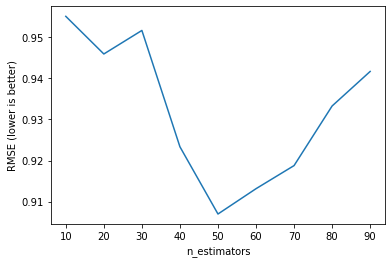

In [38]:
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')